In [1]:
import csv

def intRow(row):
    temp = []
    for t in row:
        temp.append(int(t))
    return temp

def read_x(address):
    reader = csv.reader(open(address))
    x= [intRow(row) for row in reader]
    return x

def read_y(address):
    reader = csv.reader(open(address))
    list=[intRow(row) for row in reader]
    y=sum(list,[])
    return y

X = read_x('X.csv')
Y = read_y('Y.csv')

In [2]:
random_seed = 12345
from sklearn.model_selection import train_test_split
x_random_train, x_test, y_random_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=random_seed)

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=random_seed)
x_under_train, y_under_train = rus.fit_resample(x_random_train, y_random_train)

from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=random_seed)
x_smote_train, y_smote_train = sm.fit_resample(x_random_train, y_random_train)

In [3]:

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

def print_metrics(title,y_true,y_pre):
    print(title+" dead",end = " ")
    print("recall %.2f"%recall_score(y_true, y_pre),end =" ")
    print("precision %.2f"%precision_score(y_true, y_pre),end=" ")
    print("f1_score %.2f"%f1_score(y_true, y_pre))
    
    y_flip_true = [0 if i else 1 for i in y_true]
    y_flip_pre = [0 if i else 1 for i in y_pre]
    
    print(title+" alive",end = " ")
    print("recall %.2f"%recall_score(y_flip_true, y_flip_pre),end =" ")
    print("precision %.2f"%precision_score(y_flip_true, y_flip_pre),end=" ")
    print("f1_score %.2f"%f1_score(y_flip_true, y_flip_pre))

y_pre_random_zeroR = [0 for i in range(len(y_test))]
y_pre_under_zeroR = [0 for i in range(len(y_test))]
y_pre_smote_zeroR = [0 for i in range(len(y_test))]

print_metrics("ZeroR underSampling",y_test,y_pre_under_zeroR)
print_metrics("ZeroR smote",y_test,y_pre_smote_zeroR)
print_metrics("ZeroR random",y_test,y_pre_random_zeroR)


ZeroR underSampling dead recall 0.00 precision 0.00 f1_score 0.00
ZeroR underSampling alive recall 1.00 precision 0.70 f1_score 0.82
ZeroR smote dead recall 0.00 precision 0.00 f1_score 0.00
ZeroR smote alive recall 1.00 precision 0.70 f1_score 0.82
ZeroR random dead recall 0.00 precision 0.00 f1_score 0.00
ZeroR random alive recall 1.00 precision 0.70 f1_score 0.82


D:\Anaconda\envs\NLP\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\envs\NLP\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\envs\NLP\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [4]:
from sklearn.neighbors import KNeighborsClassifier

knn_random = KNeighborsClassifier(n_neighbors=7,p=1)
knn_random.fit(x_random_train, y_random_train)
y_pre_random_knn = knn_random.predict(x_test)

knn_under = KNeighborsClassifier(n_neighbors=9,p=1)
knn_under.fit(x_under_train, y_under_train)
y_pre_under_knn = knn_under.predict(x_test)

knn_smote = KNeighborsClassifier(n_neighbors=7,p=1)
knn_smote.fit(x_smote_train, y_smote_train)
y_pre_smote_knn = knn_smote.predict(x_test)

print_metrics("Knn underSampling",y_test,y_pre_under_knn)
print_metrics("Knn smote",y_test,y_pre_smote_knn)
print_metrics("Knn random",y_test,y_pre_random_knn)

Knn underSampling dead recall 0.76 precision 0.51 f1_score 0.61
Knn underSampling alive recall 0.69 precision 0.87 f1_score 0.77
Knn smote dead recall 0.85 precision 0.46 f1_score 0.60
Knn smote alive recall 0.57 precision 0.89 f1_score 0.70
Knn random dead recall 0.44 precision 0.58 f1_score 0.50
Knn random alive recall 0.86 precision 0.78 f1_score 0.82


In [5]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,ComplementNB
from sklearn.preprocessing import MinMaxScaler

GaussianNB_random = GaussianNB()
GaussianNB_random.fit(x_random_train, y_random_train)
y_pre_random_GNB = GaussianNB_random.predict(x_test)

GaussianNB_under = GaussianNB()
GaussianNB_under.fit(x_under_train, y_under_train)
y_pre_under_GNB = GaussianNB_under.predict(x_test)

GaussianNB_smote = GaussianNB()
GaussianNB_smote.fit(x_smote_train, y_smote_train)
y_pre_smote_GNB = GaussianNB_smote.predict(x_test)


print_metrics("NB underSampling",y_test,y_pre_under_GNB)
print_metrics("NB smote",y_test,y_pre_smote_GNB)
print_metrics("NB random",y_test,y_pre_random_GNB)


NB underSampling dead recall 0.96 precision 0.35 f1_score 0.51
NB underSampling alive recall 0.21 precision 0.93 f1_score 0.34
NB smote dead recall 0.96 precision 0.36 f1_score 0.52
NB smote alive recall 0.25 precision 0.93 f1_score 0.40
NB random dead recall 0.96 precision 0.35 f1_score 0.52
NB random alive recall 0.23 precision 0.94 f1_score 0.37


In [6]:
from sklearn.neural_network import MLPClassifier

MLP_under = MLPClassifier(hidden_layer_sizes=(100,100),activation='logistic',max_iter=300)
MLP_under.fit(x_under_train, y_under_train)
y_pre_under_MLP = MLP_under.predict(x_test)

MLP_smote = MLPClassifier(hidden_layer_sizes=(100,100,100),activation='logistic',max_iter=300)
MLP_smote.fit(x_smote_train, y_smote_train)
y_pre_smote_MLP = MLP_smote.predict(x_test)

MLP_random = MLPClassifier(hidden_layer_sizes=(100,100),activation='logistic',max_iter=300)
MLP_random.fit(x_random_train, y_random_train)
y_pre_random_MLP = MLP_random.predict(x_test)

print_metrics("MLP underSampling",y_test,y_pre_under_MLP)
print_metrics("MLP smote",y_test,y_pre_smote_MLP)
print_metrics("MLP random",y_test,y_pre_random_MLP)

MLP underSampling dead recall 0.73 precision 0.49 f1_score 0.58
MLP underSampling alive recall 0.66 precision 0.85 f1_score 0.75
MLP smote dead recall 0.36 precision 0.52 f1_score 0.42
MLP smote alive recall 0.86 precision 0.75 f1_score 0.80
MLP random dead recall 0.40 precision 0.52 f1_score 0.45
MLP random alive recall 0.84 precision 0.76 f1_score 0.80


In [7]:
from sklearn.ensemble import RandomForestClassifier

rf_under = RandomForestClassifier(random_state=random_seed,n_estimators=100,criterion='gini')
rf_under.fit(x_under_train, y_under_train)
y_pre_under_rf = rf_under.predict(x_test)

rf_smote = RandomForestClassifier(random_state=random_seed,n_estimators=100,criterion='gini')
rf_smote.fit(x_smote_train, y_smote_train)
y_pre_smote_rf = rf_smote.predict(x_test)

rf_random = RandomForestClassifier(random_state=random_seed,n_estimators=100,criterion='gini')
rf_random.fit(x_random_train, y_random_train)
y_pre_random_rf = rf_random.predict(x_test)

print_metrics("RandomForeset underSampling",y_test,y_pre_under_rf)
print_metrics("RandomForeset smote",y_test,y_pre_smote_rf)
print_metrics("RandomForeset random",y_test,y_pre_random_rf)


RandomForeset underSampling dead recall 0.81 precision 0.53 f1_score 0.64
RandomForeset underSampling alive recall 0.68 precision 0.89 f1_score 0.77
RandomForeset smote dead recall 0.69 precision 0.56 f1_score 0.62
RandomForeset smote alive recall 0.77 precision 0.85 f1_score 0.81
RandomForeset random dead recall 0.39 precision 0.60 f1_score 0.47
RandomForeset random alive recall 0.89 precision 0.77 f1_score 0.82


In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


input_length = len(x_random_train[0])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

Epoch 1/20
54/54 [==============================] - 8s 35ms/step - loss: 0.6001 - accuracy: 0.6637 - recall: 0.4321 - val_loss: 0.8419 - val_accuracy: 0.5935 - val_recall: 0.5935
Epoch 2/20
54/54 [==============================] - 1s 16ms/step - loss: 0.5704 - accuracy: 0.6924 - recall: 0.5991 - val_loss: 0.7700 - val_accuracy: 0.6636 - val_recall: 0.6636
Epoch 3/20
54/54 [==============================] - 1s 15ms/step - loss: 0.5676 - accuracy: 0.7018 - recall: 0.6287 - val_loss: 0.7495 - val_accuracy: 0.6729 - val_recall: 0.6729
Epoch 4/20
54/54 [==============================] - 1s 16ms/step - loss: 0.5630 - accuracy: 0.6889 - recall: 0.6100 - val_loss: 0.7960 - val_accuracy: 0.6192 - val_recall: 0.6192
Epoch 5/20
54/54 [==============================] - 1s 17ms/step - loss: 0.5648 - accuracy: 0.6936 - recall: 0.5928 - val_loss: 0.6603 - val_accuracy: 0.7617 - val_recall: 0.7617
Epoch 6/20
54/54 [==============================] - 1s 18ms/step - loss: 0.5599 - accuracy: 0.7000 - reca

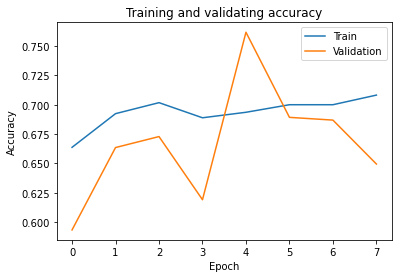

49/49 [==============================] - 1s 5ms/step
lstm underSampling dead recall 0.67 precision 0.54 f1_score 0.60
lstm underSampling alive recall 0.76 precision 0.84 f1_score 0.80


In [9]:
lstm = keras.Sequential()
lstm.add(layers.LSTM(units=100, activation='tanh', return_sequences=True, input_shape=(input_length, 1)))
lstm.add(layers.Dropout(0.5))
lstm.add(layers.LSTM(units=50, activation='tanh', return_sequences=False))
lstm.add(layers.Dropout(0.5))
lstm.add(layers.Dense(1, activation='sigmoid'))

lstm.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy',tf.keras.metrics.Recall()])

history_lstm = lstm.fit(np.array(x_under_train), np.array(y_under_train),validation_split=0.2,callbacks=[callback],epochs=20)
plt.plot(history_lstm.history['accuracy'], label='Train')
plt.plot(history_lstm.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Training and validating accuracy')
plt.legend()
plt.show()

y_pre_under_lstm = (lstm.predict(x_test) > 0.5).astype("int32").flatten()
print_metrics("lstm underSampling",y_test,y_pre_under_lstm.tolist())

Epoch 1/20
130/130 [==============================] - 6s 23ms/step - loss: 0.5839 - accuracy: 0.6790 - recall_1: 0.5248 - val_loss: 0.8257 - val_accuracy: 0.5932 - val_recall_1: 0.5932
Epoch 2/20
130/130 [==============================] - 2s 16ms/step - loss: 0.5512 - accuracy: 0.7051 - recall_1: 0.6054 - val_loss: 0.7753 - val_accuracy: 0.7043 - val_recall_1: 0.7043
Epoch 3/20
130/130 [==============================] - 2s 15ms/step - loss: 0.5564 - accuracy: 0.6986 - recall_1: 0.5990 - val_loss: 0.6481 - val_accuracy: 0.7681 - val_recall_1: 0.7681
Epoch 4/20
130/130 [==============================] - 2s 15ms/step - loss: 0.5500 - accuracy: 0.7056 - recall_1: 0.6422 - val_loss: 0.8173 - val_accuracy: 0.7469 - val_recall_1: 0.7469
Epoch 5/20
130/130 [==============================] - 2s 16ms/step - loss: 0.5505 - accuracy: 0.6942 - recall_1: 0.6022 - val_loss: 0.7343 - val_accuracy: 0.7478 - val_recall_1: 0.7478
Epoch 6/20
130/130 [==============================] - 2s 16ms/step - loss: 

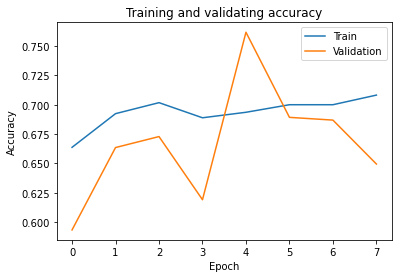

49/49 [==============================] - 1s 5ms/step
lstm smote dead recall 0.66 precision 0.55 f1_score 0.60
lstm smote alive recall 0.77 precision 0.84 f1_score 0.80


In [10]:
lstm3 = keras.Sequential()
lstm3.add(layers.LSTM(units=100, activation='tanh', return_sequences=True, input_shape=(input_length, 1)))
lstm3.add(layers.Dropout(0.5))
lstm3.add(layers.LSTM(units=50, activation='tanh', return_sequences=False))
lstm3.add(layers.Dropout(0.5))
lstm3.add(layers.Dense(1, activation='sigmoid'))

lstm3.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy',tf.keras.metrics.Recall()])

history_lstm3 = lstm3.fit(np.array(x_smote_train), np.array(y_smote_train),validation_split=0.2,callbacks=[callback],epochs=20)
plt.plot(history_lstm.history['accuracy'], label='Train')
plt.plot(history_lstm.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Training and validating accuracy')
plt.legend()
plt.show()

y_pre_smote_lstm = (lstm3.predict(x_test) > 0.5).astype("int32").flatten()
print_metrics("lstm smote",y_test,y_pre_smote_lstm.tolist())

Epoch 1/20
92/92 [==============================] - 5s 26ms/step - loss: 0.5381 - accuracy: 0.7073 - recall_2: 0.2800 - val_loss: 0.4966 - val_accuracy: 0.7305 - val_recall_2: 0.5160
Epoch 2/20
92/92 [==============================] - 1s 15ms/step - loss: 0.5114 - accuracy: 0.7220 - recall_2: 0.3718 - val_loss: 0.4933 - val_accuracy: 0.7456 - val_recall_2: 0.4612
Epoch 3/20
92/92 [==============================] - 1s 15ms/step - loss: 0.5069 - accuracy: 0.7298 - recall_2: 0.3353 - val_loss: 0.4873 - val_accuracy: 0.7415 - val_recall_2: 0.5160
Epoch 4/20
92/92 [==============================] - 1s 16ms/step - loss: 0.5072 - accuracy: 0.7264 - recall_2: 0.3871 - val_loss: 0.4885 - val_accuracy: 0.7182 - val_recall_2: 0.1644
Epoch 5/20
92/92 [==============================] - 1s 15ms/step - loss: 0.5011 - accuracy: 0.7363 - recall_2: 0.3718 - val_loss: 0.4843 - val_accuracy: 0.7415 - val_recall_2: 0.5708
Epoch 6/20
92/92 [==============================] - 1s 16ms/step - loss: 0.5006 - acc

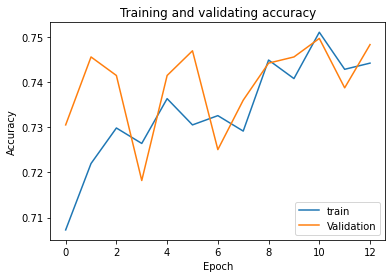

49/49 [==============================] - 1s 9ms/step
lstm random dead recall 0.45 precision 0.61 f1_score 0.51
lstm random alive recall 0.88 precision 0.78 f1_score 0.83


In [11]:
lstm2 = keras.Sequential()
lstm2.add(layers.LSTM(units=100, activation='tanh', return_sequences=True, input_shape=(input_length, 1)))
lstm2.add(layers.Dropout(0.2))
lstm2.add(layers.LSTM(units=50, activation='tanh', return_sequences=False))
lstm2.add(layers.Dropout(0.2))
lstm2.add(layers.Dense(1, activation='sigmoid'))


lstm2.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy',tf.keras.metrics.Recall()])

history_lstm2 = lstm2.fit(np.array(x_random_train), np.array(y_random_train),validation_split=0.2,callbacks=[callback], epochs=20)
plt.plot(history_lstm2.history['accuracy'], label='train')
plt.plot(history_lstm2.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Training and validating accuracy')
plt.legend()
plt.show()

y_pre_random_lstm = (lstm2.predict(x_test) > 0.5).astype("int32").flatten()
print_metrics("lstm random",y_test,y_pre_random_lstm.tolist())

In [12]:
balance_pre_list = [y_pre_under_zeroR,
                    y_pre_under_knn,
                    y_pre_under_GNB,
                    y_pre_under_MLP,
                    y_pre_under_rf,
                    y_pre_under_lstm.tolist()
                    ]

balance_2_pre_list = [y_pre_smote_zeroR,
                      y_pre_smote_knn,
                      y_pre_smote_GNB,
                      y_pre_smote_MLP,
                      y_pre_smote_rf,
                      y_pre_smote_lstm.tolist()
                      ]

random_pre_list = [y_pre_random_zeroR,
                   y_pre_random_knn,
                   y_pre_random_GNB,
                   y_pre_random_MLP,
                   y_pre_random_rf,
                   y_pre_random_lstm.tolist()
                   ]

test_list = [y_test,y_test,y_test]
pre_list =[balance_pre_list, balance_2_pre_list,random_pre_list]

def get_metrics(y_true,y_pre):    
    result1=[recall_score(y_true, y_pre),
             precision_score(y_true, y_pre),
             f1_score(y_true, y_pre)]
    
    y_flip_true = [0 if i else 1 for i in y_true]
    y_flip_pre = [0 if i else 1 for i in y_pre]
    
    result2=[recall_score(y_flip_true, y_flip_pre),
             precision_score(y_flip_true, y_flip_pre),
             f1_score(y_flip_true, y_flip_pre)]
    
    return result1,result2

result= []
for i in range(len(test_list)):
    test_y = test_list[i]
    pre_y_list = pre_list[i]
    result_list1=[]
    result_list2=[]
    for pre_y in pre_y_list:
        result1,result2 = get_metrics(test_y,pre_y)
        result_list1+=result1
        result_list2+=result2
    result.append(result_list1)
    result.append(result_list2)

with open('./result/original_result.csv', 'w',newline='') as f:
    print("writing..")
    writer = csv.writer(f)
    for row in result:
        writer.writerow(row)
print("finish..")

D:\Anaconda\envs\NLP\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\envs\NLP\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\envs\NLP\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


writing..
finish..
